In [1]:
%cd ../

/home/users/dmoreno2016/VisionTransformers


In [2]:
import mlflow
import pandas as pd
import matplotlib.pyplot as plt
import os
os.environ["PATH"] = "/home/users/dmoreno2016/.TinyTeX/bin/x86_64-linux:" + os.environ["PATH"]

plt.rcParams.update({
    "text.usetex": True,
    "pgf.texsystem": "pdflatex",
    "font.family": "serif",
    "font.serif": ["Palatino"],
})


import warnings
warnings.filterwarnings('ignore')

In [3]:
mlflow.set_tracking_uri("file:./results/macho/ml-runs")

In [4]:
data_name =  'macho_multiband'
experiment_name = f"ft_classification/{data_name}/best_params"

experiment = mlflow.get_experiment_by_name(experiment_name)
if experiment:
    experiment_id = experiment.experiment_id
    print(f"Experiment ID for '{experiment_name}': {experiment_id}")
else:
    print(f"Experiment '{experiment_name}' not found.")

runs = mlflow.search_runs(experiment_ids=[experiment_id])

order_columns = [
    'run_id',
    'status',
    'metrics.epoch',
    'metrics.f1/test',
    'metrics.loss/test',
    'params.imgs_params/fig_params/linewidth',
    'params.imgs_params/fig_params/markersize',
    'params.imgs_params/input_type',
    'params.imgs_params/use_err',
    'params.training/lr',
    'params.loader/spc',
    'start_time',
    'end_time',
]

show_df = runs[order_columns]
show_df.loc[:, 'training_time'] = show_df['end_time'] - show_df['start_time']
cols = show_df.columns.tolist()
cols.insert(2, cols.pop(cols.index('training_time')))
show_df = show_df[cols].drop(['end_time', 'start_time'], axis=1)
show_df = show_df.sort_values(by=['metrics.f1/test'], ascending=False)

group_columns = [
    'params.imgs_params/fig_params/linewidth',
    'params.imgs_params/fig_params/markersize',
    'params.imgs_params/input_type',
    'params.imgs_params/use_err',
    'params.training/lr',
    'params.loader/spc',
]

# Calculating the mean for metrics within each group
multiband_stats = show_df.groupby(group_columns).agg({
    'metrics.f1/test': ['mean', 'std'],
    'metrics.loss/test': ['mean', 'std'],
    'training_time': ['mean', 'std']
}).reset_index()

# Adjusting the rename dictionary to handle tuple column names
rename_dict = {
    ('params.imgs_params/fig_params/linewidth', ''): 'Linewidth',
    ('params.imgs_params/fig_params/markersize', ''): 'Markersize',
    ('params.imgs_params/input_type', ''): 'Input Type',
    ('params.imgs_params/use_err', ''): 'Use Error',
    ('params.training/lr', ''): 'Learning Rate',
    ('metrics.f1/test', 'mean'): 'avg_f1/test',
    ('metrics.f1/test', 'std'): 'std_f1/test',
    ('metrics.loss/test', 'mean'): 'avg_loss/test',
    ('metrics.loss/test', 'std'): 'std_loss/test',
    ('training_time', 'mean'): 'avg_training_time',
    ('training_time', 'std'): 'std_training_time',
    ('params.loader/spc', ''): 'SPC'
}

# Renaming columns using the adjusted dictionary
multiband_stats.columns = [rename_dict.get(col, col) for col in multiband_stats.columns]
multiband_stats

Experiment ID for 'ft_classification/macho_multiband/best_params': 967059217756749632


,Linewidth,Markersize,Input Type,Use Error,Learning Rate,SPC,avg_f1/test,std_f1/test,avg_loss/test,std_loss/test,avg_training_time,std_training_time
0,0.5,2.0,overlay,True,5e-05,20,0.668658,0.020938,0.920130,0.152127,0 days 00:11:20.977666666,0 days 00:03:31.005824093
1,1.0,2.0,2grid,False,5e-05,500,0.816867,0.012236,0.967911,0.266797,0 days 00:18:55.852000,0 days 00:02:30.562285795
2,1.0,3.0,overlay,True,5e-05,500,0.805625,0.005581,0.632672,0.068962,0 days 00:19:51.902666666,0 days 00:01:56.872907708
3,1.5,3.0,2grid,True,5e-06,all,0.842743,0.024305,0.544595,0.023076,0 days 02:15:08.519000,0 days 00:24:43.228582534
4,2.0,1.0,2grid,True,5e-05,20,0.642706,0.040072,0.986315,0.102228,0 days 00:09:19.409000,0 days 00:02:01.146650391
5,2.0,1.0,overlay,True,5e-06,all,0.823195,0.022954,0.733945,0.224145,0 days 02:11:28.103333333,0 days 00:19:19.507582968


In [5]:
multiband_stats = multiband_stats[multiband_stats["SPC"].isin(["20", "500", "all"])].sort_values(by="SPC")
overlay_multiband = multiband_stats[multiband_stats['Input Type'] == 'overlay']
avg_overlay_multiband = overlay_multiband["avg_f1/test"].values
std_overlay_multiband = overlay_multiband["std_f1/test"].values
print('avg overlay:', avg_overlay_multiband)
print('std overlay:', std_overlay_multiband)

grid_multiband = multiband_stats[multiband_stats['Input Type'] == '2grid']
avg_grid_multiband = grid_multiband["avg_f1/test"].values
std_grid_multiband = grid_multiband["std_f1/test"].values
print('avg 2grid:', avg_grid_multiband)
print('std 2grid:', std_grid_multiband)

avg overlay: [0.6686581  0.80562486 0.8231945 ]
std overlay: [0.02093767 0.00558112 0.02295427]
avg 2grid: [0.64270614 0.81686664 0.8427435 ]
std 2grid: [0.04007241 0.01223631 0.02430456]


In [6]:
data_name =  'macho'
experiment_name = f"ft_classification/{data_name}/best_params"

experiment = mlflow.get_experiment_by_name(experiment_name)
if experiment:
    experiment_id = experiment.experiment_id
    print(f"Experiment ID for '{experiment_name}': {experiment_id}")
else:
    print(f"Experiment '{experiment_name}' not found.")

runs = mlflow.search_runs(experiment_ids=[experiment_id])

order_columns = [
    'run_id',
    'status',
    'metrics.epoch',
    'metrics.f1/test',
    'metrics.loss/test',
    'params.imgs_params/fig_params/linewidth',
    'params.imgs_params/fig_params/markersize',
    'params.imgs_params/input_type',
    'params.imgs_params/use_err',
    'params.training/lr',
    'params.loader/spc',
    'start_time',
    'end_time',
]

show_df = runs[order_columns]
show_df.loc[:, 'training_time'] = show_df['end_time'] - show_df['start_time']
cols = show_df.columns.tolist()
cols.insert(2, cols.pop(cols.index('training_time')))
show_df = show_df[cols].drop(['end_time', 'start_time'], axis=1)
show_df = show_df.sort_values(by=['metrics.f1/test'], ascending=False)

group_columns = [
    'params.imgs_params/fig_params/linewidth',
    'params.imgs_params/fig_params/markersize',
    'params.imgs_params/input_type',
    'params.imgs_params/use_err',
    'params.training/lr',
    'params.loader/spc',
]

# Calculating the mean for metrics within each group
singleband_stats = show_df.groupby(group_columns).agg({
    'metrics.f1/test': ['mean', 'std'],
    'metrics.loss/test': ['mean', 'std'],
    'training_time': ['mean', 'std']
}).reset_index()

# Adjusting the rename dictionary to handle tuple column names
rename_dict = {
    ('params.imgs_params/fig_params/linewidth', ''): 'Linewidth',
    ('params.imgs_params/fig_params/markersize', ''): 'Markersize',
    ('params.imgs_params/input_type', ''): 'Input Type',
    ('params.imgs_params/use_err', ''): 'Use Error',
    ('params.training/lr', ''): 'Learning Rate',
    ('metrics.f1/test', 'mean'): 'avg_f1/test',
    ('metrics.f1/test', 'std'): 'std_f1/test',
    ('metrics.loss/test', 'mean'): 'avg_loss/test',
    ('metrics.loss/test', 'std'): 'std_loss/test',
    ('training_time', 'mean'): 'avg_training_time',
    ('training_time', 'std'): 'std_training_time',
    ('params.loader/spc', ''): 'SPC'
}

# Renaming columns using the adjusted dictionary
singleband_stats.columns = [rename_dict.get(col, col) for col in singleband_stats.columns]
singleband_stats

#singleband_stats.drop([2], axis=0, inplace=True)

Experiment ID for 'ft_classification/macho/best_params': 887536164124160171


,Linewidth,Markersize,Input Type,Use Error,Learning Rate,SPC,avg_f1/test,std_f1/test,avg_loss/test,std_loss/test,avg_training_time,std_training_time
0,1.0,1.0,overlay,True,5e-06,500,0.774139,0.013366,0.617047,0.017892,0 days 00:20:30.628000,0 days 00:05:22.027991969
1,1.5,5.0,overlay,True,5e-05,20,0.601297,0.045559,1.170994,0.181865,0 days 00:06:54.663333333,0 days 00:00:59.181154655
2,2.0,1.0,overlay,True,5e-06,all,0.797549,0.021896,0.838137,0.026434,0 days 01:32:55.856000,0 days 00:10:08.970326708


In [7]:
singleband_stats = singleband_stats[singleband_stats["SPC"].isin(["20", "500", "all"])].sort_values(by="SPC")
overlay_singleband = singleband_stats[singleband_stats['Input Type'] == 'overlay']
avg_f1_swinv2 = overlay_singleband["avg_f1/test"].values
std_f1_swinv2 = overlay_singleband["std_f1/test"].values
print('avg singleband:', avg_f1_swinv2)
print('std singleband:', std_f1_swinv2)

avg singleband: [0.6012972  0.77413887 0.79754857]
std singleband: [0.04555858 0.01336625 0.02189602]


In [8]:
#avg_overlay_multiband = swinv2_stats["avg_f1/test"].values
#std_overlay_multiband = swinv2_stats["std_f1/test"].values

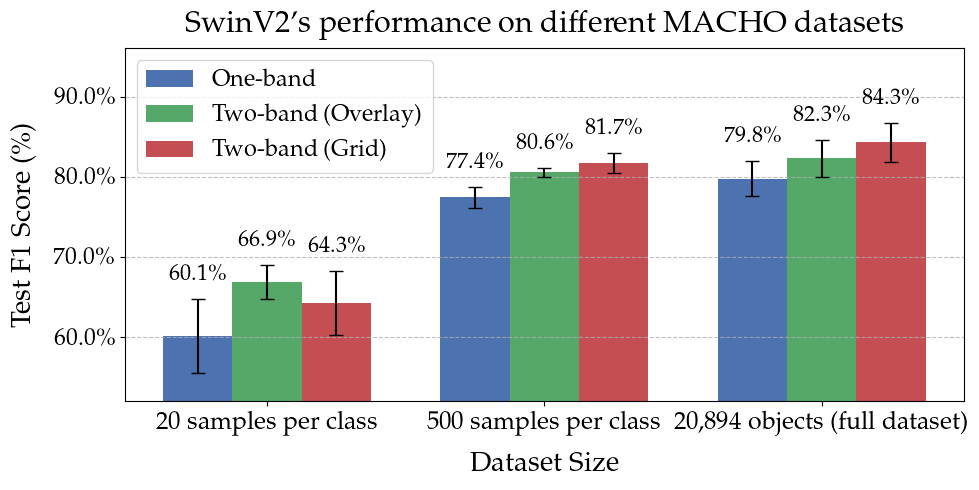

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import PercentFormatter

fs = 16

# Etiquetas para las muestras por clase
spc_labels = ["20 samples p/class", "500 samples p/class", "Full dataset"]

# Configuración para las barras
x = np.arange(len(spc_labels))
width = 0.25

# Mejorar el diseño del gráfico con porcentajes y agrandar etiquetas y ticks
fig, ax = plt.subplots(figsize=(10, 5))  # Tamaño ajustado para mayor claridad

# Cambiar a colores más sobrios para un artículo científico
bar1 = ax.bar(x - width, avg_f1_swinv2, width, yerr=std_f1_swinv2, label="One-band", color="#4C72B0", capsize=5)
bar2 = ax.bar(x, avg_overlay_multiband, width, yerr=std_overlay_multiband, label="Two-band (Overlay)", color="#55A868", capsize=5)
bar3 = ax.bar(x + width, avg_grid_multiband, width, yerr=std_grid_multiband, label="Two-band (Grid)", color="#C44E52", capsize=5)

# Etiquetas más limpias y claras
ax.set_ylabel(f"Test F1 Score (\%)", fontsize=fs + 4, labelpad=12)
ax.set_xlabel("Dataset Size", fontsize=fs + 4, labelpad=12)
ax.set_title("SwinV2's performance on different MACHO datasets", fontsize=fs + 6, weight='bold', pad=12)
#ax.set_title("Models' performance on different MACHO datasets", fontsize=fs + 4, weight='bold', pad=12)
ax.set_xticks(x)
ax.set_xticklabels(["20 samples per class", "500 samples per class", "20,894 objects (full dataset)"], fontsize=fs + 2)
ax.tick_params(axis='y', labelsize=fs+1)
ax.set_ylim(0.52, 0.96)
ax.legend(fontsize=fs + 1, loc="upper left")

ax.yaxis.set_major_formatter(PercentFormatter(1.0))

# Añadir los valores sobre las barras, alineados con las barras de error
def add_labels_with_error(bars, stds):
    for bar, std in zip(bars, stds):
        height = bar.get_height()
        if height > 0:  # Solo etiquetar las barras que tienen valores
            ax.text(bar.get_x() + bar.get_width() / 2, height + std + 0.015, f"{height*100:.1f}\%",
                    ha="center", va="bottom", fontsize=fs, color="black")

add_labels_with_error(bar1, std_f1_swinv2)
add_labels_with_error(bar2, std_overlay_multiband)
add_labels_with_error(bar3, std_grid_multiband)

# Mejorar el diseño del gráfico con cuadrícula más ligera
ax.grid(axis="y", linestyle="--", alpha=0.8)
plt.tight_layout()
os.makedirs('./images', exist_ok=True)
plt.savefig("./images/Model_performance_MACHO.pdf", format='pdf', bbox_inches='tight')
plt.show()


In [10]:
## ASTROMER PAPER RESULTS
# Ajustar los datos genéricos para incluir el valor "Full dataset" como barra en blanco
avg_f1_Astromer_F = [0.560, 0.710, 0]  # Añadir 0 para la barra en blanco en "Full dataset"
std_f1_Astromer_F = [0.025, 0.018, 0]  # Añadir 0 para la desviación estándar
avg_f1_Astromer_T = [0.440, 0.730, 0]  # Añadir 0 para la barra en blanco en "Full dataset"
std_f1_Astromer_T = [0.050, 0.030, 0]  # Añadir 0 para la desviación estándar